# 9.1

In [476]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from pandas import read_csv
from numpy.linalg import inv
import math
import random

%matplotlib inline

In [477]:
def shuffle(data):
    data = read_csv('forestfires.csv')
    data = data.iloc[np.random.permutation(len(data))]

    data.replace(['aug', 'jun', 'jul', 'jan', 'feb', 'mar', 'apr', 'may', 'sep', 'oct', 'nov', 'dec'], 
             [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'month')
    area = data.area.copy()
    data.drop('day',axis=1,inplace=True)
    data.drop('area',axis=1,inplace=True)
    data['lenear'] = 1
    return data, area
data, area = shuffle(data)
data

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,lenear
128,3,5,0,91.4,37.9,673.8,5.2,15.9,46,3.6,0,1
392,1,3,0,91.0,276.3,825.1,7.1,21.9,43,4.0,0,1
60,2,2,0,89.3,51.3,102.2,9.6,11.5,39,5.8,0,1
0,7,5,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0,1
129,2,5,0,92.6,46.5,691.8,8.8,15.4,35,0.9,0,1
275,4,6,0,84.6,26.4,352.0,2.0,5.1,61,4.9,0,1
224,7,4,0,90.1,82.9,735.7,6.2,15.4,57,4.5,0,1
1,7,4,0,90.6,35.4,669.1,6.7,18.0,33,0.9,0,1
13,6,5,0,90.9,126.5,686.5,7.0,21.3,42,2.2,0,1
296,6,4,1,90.4,89.5,290.8,6.4,14.3,46,1.8,0,1


Разделим данные в отношении 7:3.

In [478]:
first = data[:362]
area_1 = area[:362]
second = data[363:]
area_2 = area[363:]

Построим регрессионную модель по первой части выборки. 

$X = Z\theta +\varepsilon$. Найдем оценку коэффициентов линейной регрессии методом наименьших квадратов:

$\hat{\theta} = (Z^TZ)^{-1}Z^TX$, где X - вектoр данных area, Z - матрица остальных данных.

In [479]:
def est(z, x):    
    Z = np.matrix(z)
    X = np.matrix(x)
    Z_T = Z.transpose()
    theta = inv(Z_T*Z) * Z_T * X.transpose()
    return theta

In [480]:
theta_1 = est(first.as_matrix(), area_1.as_matrix())
for j in range(len(theta_1)):
    print(j + 1, ": ", theta[j])

1 :  [[ 0.04141153]]
2 :  [[ 0.00174335]]
3 :  [[-0.41973402]]
4 :  [[ 0.00509793]]
5 :  [[ 0.00382227]]
6 :  [[-0.00025025]]
7 :  [[-0.01490258]]
8 :  [[ 0.01151988]]
9 :  [[-0.00817923]]
10 :  [[ 0.06621594]]
11 :  [[ 0.16797497]]
12 :  [[ 0.31239513]]


\- вектор $\hat{\theta}$. Посчитаем среднеквадратичную ошибку $\hat{\sigma} = \frac{||X-Z\hat{\theta}||^2}{n-k}$ по второй части выборки.

In [481]:
def sigma(z, x, t):
    Z = np.matrix(z)
    X = np.matrix(x)
    
    alpha = (np.array(X.transpose()-Z*t))**2
    return (alpha.sum()/(len(x) - 12))**0.5

In [482]:
print("Полученная среднеквадратичная ошибка: ", sigma(second.as_matrix(), area_2.as_matrix(), theta_1))

Полученная среднеквадратичная ошибка:  32.7987720055


Сделаем для area преобразование $f(x) = ln(c+x)$ и построим для нее регрессионную модель. Посчитаем среднеквадратичную ошибку для преобразованных значений по данному правилу и для исходных, применив в последнем случае к оценкам обратное к f преобразование.

In [483]:
def error(first, second, area_1, area_2, c):
    new_area_1 = [math.log(c + x) for x in area_1]
    new_area_2 = [math.log(c + x) for x in area_2]
    theta = est(first.as_matrix(), new_area_1)    
    new_theta = np.matrix([math.exp(x) - c for x in theta]).transpose()
    one = sigma(second.as_matrix(), new_area_2, theta)
    two = sigma(second.as_matrix(), area_2.as_matrix(), new_theta)
    return one, two

Сделаем сначала расчет для произвольного c. Например, возьмем c = 3:

In [484]:
err = error(first, second, area_1, area_2, 3)
print("Ошибка для преобразованных данных по правилу f=ln(x+c): ", err[0])
print("Ошибка для исходных данных: ", err[1])

Ошибка для преобразованных данных по правилу f=ln(x+c):  1.06481068753
Ошибка для исходных данных:  1895.86278438


Как видим, преобразованные данные дают лучшую оценку.

Рассчитаем среднеквадратичные ошибки при различных c и найдем, при каком c предсказания получаются лучше.

In [485]:
L = np.array([])
x = np.arange(0.1,100,0.1)
for i in x:
    L = np.append(L, error(first, second, area_1, area_2, i)[1])
print("Предсказания получаются лучше всего при c = ", x[np.where(L == L.min())][0])

Предсказания получаются лучше всего при c =  1.0


Тогда наше пробразование$f(x) = ln(x+c)$ хорошо тем, что оно $area = 0$ (которых в нашей выборке 247 штук) переводит в $f(area) = 0$. Таким образом, логарифмирование улучшает нашу выборку и сопоставляет старым величинам величины, более близкие к нулю. Таким образом, наша выборка становится более симметричной.

Разобьем выборку несколькими способами и пронаблюдаем зависимость среднеквадратичной ошибки от разбиения выборки. Произведем 100 разбиений и построим график значения среднеквадратичной ошибки от номера разбиения.

In [488]:
R = np.array([])
n = np.arange(100)
for i in n:
    data, area = shuffle(data)
    first = data[:362]
    area_1 = area[:362]
    second = data[363:]
    area_2 = area[363:]
    R = np.append(R, error(first, second, area_1, area_2, 1)[0])   
    

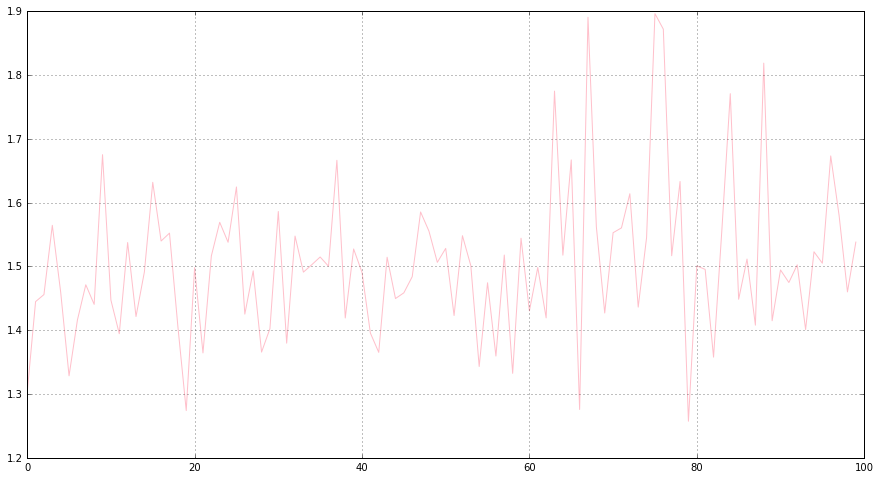

In [491]:
plt.figure(figsize=(15, 8))
plt.plot(n, R, color='pink')
plt.grid()
plt.show() 

Как видно из графика, разброс среднеквадратичной ошибки в зависимости от разбиения колеблется в допустимых пределах. Следовательно, никакого ухудшения качества не замечено.